In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# load datasets

athletes = pd.read_csv('C:/Users/Chuah Wei Jie/Desktop/Lets GO/Project/Olympics/athlete_events.csv')
regions = pd.read_csv('C:/Users/Chuah Wei Jie/Desktop/Lets GO/Project/Olympics/noc_regions.csv')

In [3]:
athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [5]:
#join dataframes

athletes_df = athletes.merge(regions, how = 'left', on = 'NOC') # how -> what type of join, on -> column to join on (similar to SQL)
athletes_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [6]:
athletes_df.shape #(number of records/rows, number of columns)

(271116, 17)

In [7]:
# Make column names consistent (region -> Region & notes -> Notes)

athletes_df.rename(columns={'region':'Region', 'notes':'Notes'}, inplace = True)

In [8]:
athletes_df.head() # to verify that change has been made

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [9]:
athletes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
Region    270746 non-null object
Notes     5039 non-null object
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


In [10]:
athletes_df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [11]:
# check the Null values, this shows which columns as NaN values

nan_values = athletes_df.isna()
nan_columns = nan_values.any()

nan_columns

ID        False
Name      False
Sex       False
Age        True
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal      True
Region     True
Notes      True
dtype: bool

In [12]:
# number of Null Values for each column

athletes_df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
Region       370
Notes     266077
dtype: int64

In [13]:
# India details using query function (take note of the single/double quotes in the query)

athletes_df.query('Team == "India"').head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
505,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 110 metres Hurdles,NaN,India,NaN
506,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 400 metres Hurdles,NaN,India,NaN
895,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 800 metres,NaN,India,NaN
896,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 4 x 400 metres Relay,NaN,India,NaN
897,512,Shiny Kurisingal Abraham-Wilson,F,23.0,167.0,53.0,India,IND,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Women's 800 metres,NaN,India,NaN


In [14]:
# Singapore details

athletes_df.query('Team == "Singapore"').head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
578,332,Zarinah Abdullah,F,21.0,NaN,NaN,Singapore,SGP,1992 Summer,1992,Summer,Barcelona,Badminton,Badminton Women's Singles,NaN,NaN,NaN
579,332,Zarinah Abdullah,F,25.0,NaN,NaN,Singapore,SGP,1996 Summer,1996,Summer,Atlanta,Badminton,Badminton Women's Singles,NaN,NaN,NaN
2719,1515,Saiyidah Aisyah Mohamed Rafa'ee,F,28.0,173.0,68.0,Singapore,SGP,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Women's Single Sculls,NaN,NaN,NaN
7659,4264,Ang Peng Siong,M,21.0,180.0,75.0,Singapore,SGP,1984 Summer,1984,Summer,Los Angeles,Swimming,Swimming Men's 100 metres Freestyle,NaN,NaN,NaN
7660,4264,Ang Peng Siong,M,21.0,180.0,75.0,Singapore,SGP,1984 Summer,1984,Summer,Los Angeles,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,NaN,NaN,NaN


In [15]:
# Top 10 countries with most participation over the years

top_10_countries = athletes_df.Team.value_counts().sort_values(ascending=False).head(10)

top_10_countries

United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Canada            9279
Japan             8289
Sweden            8052
Australia         7513
Hungary           6547
Name: Team, dtype: int64

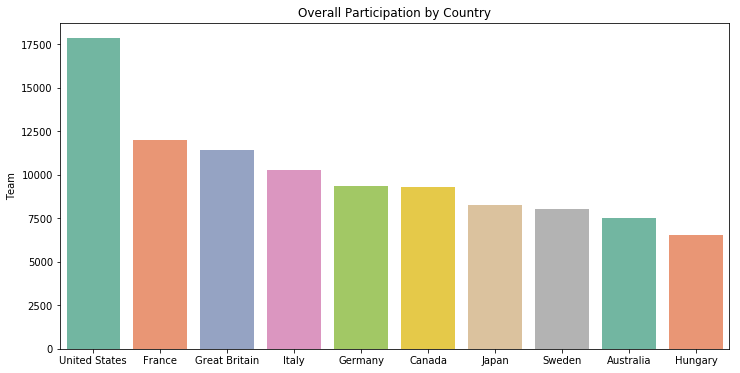

In [16]:
# plot bar chart for top_10_countries

plt.figure(figsize=(12,6))
#plt.xticks(rotation=20)
plt.title('Overall Participation by Country')
sns.barplot(x=top_10_countries.index, y=top_10_countries, palette = 'Set2')

(array([1.4000e+01, 2.2600e+02, 3.0400e+03, 9.2280e+03, 1.9795e+04,
        3.4422e+04, 4.2689e+04, 4.1427e+04, 3.3700e+04, 2.5506e+04,
        1.7047e+04, 1.1046e+04, 7.1180e+03, 4.4560e+03, 3.0170e+03,
        2.1630e+03, 1.6590e+03, 1.2670e+03, 8.3700e+02, 7.6900e+02,
        4.7700e+02, 4.4400e+02, 2.6600e+02, 2.0000e+02, 1.7100e+02,
        1.5600e+02, 1.1800e+02, 1.1400e+02, 5.6000e+01, 8.5000e+01,
        6.1000e+01, 3.2000e+01, 1.6000e+01, 9.0000e+00]),
 array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42,
        44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76,
        78]),
 <a list of 34 Patch objects>)

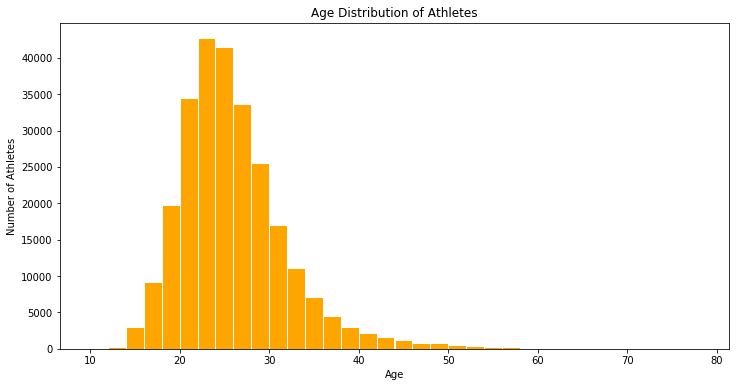

In [17]:
# Age distribution of participants

plt.figure(figsize=(12,6))
plt.title('Age Distribution of Athletes')
plt.xlabel('Age')
plt.ylabel('Number of Athletes')

plt.hist(athletes_df.Age, bins = np.arange(10,80,2), color = 'orange', edgecolor = 'white')

# np.arange(10,80,2) -> analyse data start from 10 to 80 with 2 as increment

In [18]:
# List of sports for Winter Olympics in an array

winter_sports = athletes_df[athletes_df.Season == 'Winter'].Sport.unique()

winter_sports

array(['Speed Skating', 'Cross Country Skiing', 'Ice Hockey', 'Biathlon',
       'Alpine Skiing', 'Luge', 'Bobsleigh', 'Figure Skating',
       'Nordic Combined', 'Freestyle Skiing', 'Ski Jumping', 'Curling',
       'Snowboarding', 'Short Track Speed Skating', 'Skeleton',
       'Military Ski Patrol', 'Alpinism'], dtype=object)

In [19]:
# List of sports for Summer Olympics in an array

summer_sports = athletes_df[athletes_df.Season == 'Summer'].Sport.unique()

summer_sports

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

In [20]:
# number of Male and Female participants

gender_counts = athletes_df.Sex.value_counts()
gender_counts

M    196594
F     74522
Name: Sex, dtype: int64

([<matplotlib.patches.Wedge at 0x28f1032b940>,
 [Text(0.20089640434146097, -1.081499253223354, 'M'),
  Text(-0.2008963030841931, 1.081499272032628, 'F')],
 [Text(0.10957985691352415, -0.5899086835763748, '72.5%'),
  Text(-0.10957980168228713, 0.5899086938359788, '27.5%')])

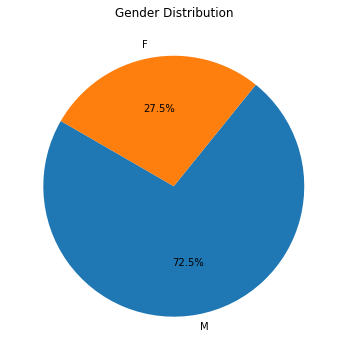

In [21]:
# plot Pie chart for male and female paricipants

plt.figure(figsize=(12,6))
plt.title('Gender Distribution')

plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=150)

In [22]:
# Number of female athletes that participated in each Summer Olympics

female_participants = athletes_df[(athletes_df.Sex=='F') & (athletes_df.Season=='Summer')][['Sex', 'Year']]
female_participants = female_participants.groupby('Year').count().reset_index()

female_participants.tail()

,Year,Sex
23,2000,5431
24,2004,5546
25,2008,5816
26,2012,5815
27,2016,6223


In [23]:
# filter out only female athletes which participated in Summer Olympics from original dataset

womenOlympics = athletes_df[(athletes_df.Sex=='F') & (athletes_df.Season=='Summer')]

womenOlympics.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN
27,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 4 x 100 metres Relay,NaN,Netherlands,NaN
32,13,Minna Maarit Aalto,F,30.0,159.0,55.5,Finland,FIN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Women's Windsurfer,NaN,Finland,NaN
33,13,Minna Maarit Aalto,F,34.0,159.0,55.5,Finland,FIN,2000 Summer,2000,Summer,Sydney,Sailing,Sailing Women's Windsurfer,NaN,Finland,NaN
79,21,Ragnhild Margrethe Aamodt,F,27.0,163.0,NaN,Norway,NOR,2008 Summer,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold,Norway,NaN


Text(0.5, 1.0, 'Female Participation over the years')

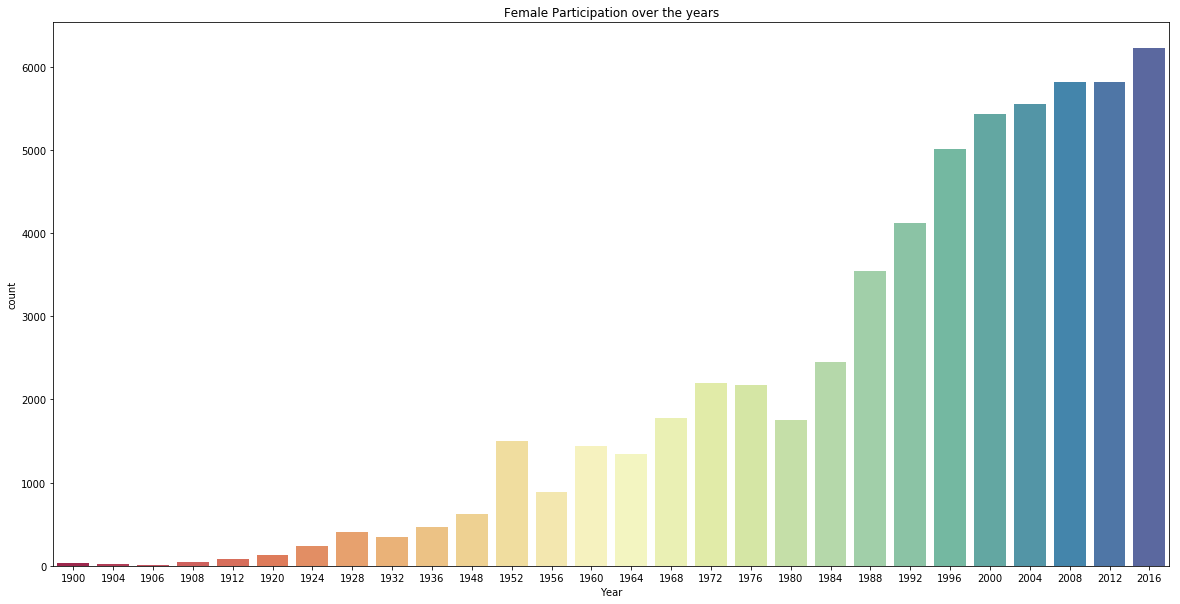

In [24]:
# plot Number of female athletes that participated in each Summer Olympics

plt.figure(figsize=(20,10))
sns.countplot(x='Year', data=womenOlympics, palette='Spectral')
plt.title('Female Participation over the years')

Text(0.5, 1.0, 'Female Participation over the years')

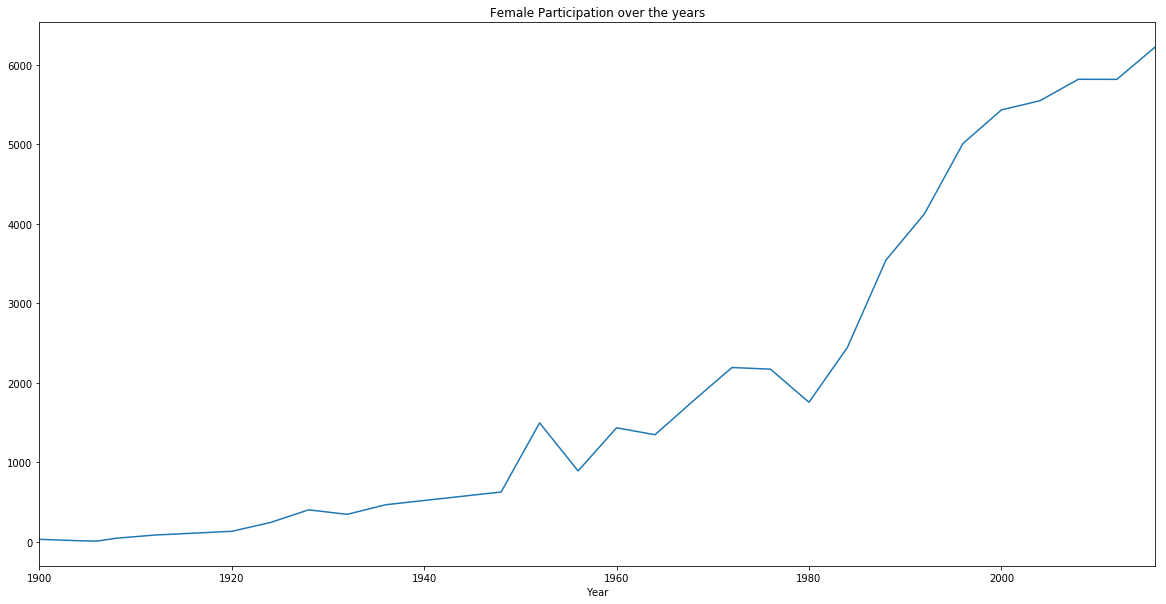

In [25]:
# Same info in line chart

part=womenOlympics.groupby('Year')['Sex'].value_counts()

plt.figure(figsize=(20,10))
part.loc[:,'F'].plot()
plt.title('Female Participation over the years')

In [26]:
# filter out only athletes which won Gold medal

goldMedals = athletes_df[(athletes_df.Medal=='Gold')]

goldMedals.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN


In [27]:
# remove entries without an Age aka Null values for age

goldMedals = goldMedals[np.isfinite(goldMedals['Age'])]

In [28]:
# Number of people who won gold medals when they are older than 60 years old

goldMedals['ID'][goldMedals['Age'] > 60].count()

6

In [29]:
sporting_event = goldMedals['Sport'][goldMedals['Age'] > 60]

sporting_event

104003    Art Competitions
105199               Roque
190952             Archery
226374             Archery
233390            Shooting
261102             Archery
Name: Sport, dtype: object

Text(0.5, 1.0, 'Number of Gold medals won by participants above the age of 60 by Sport')

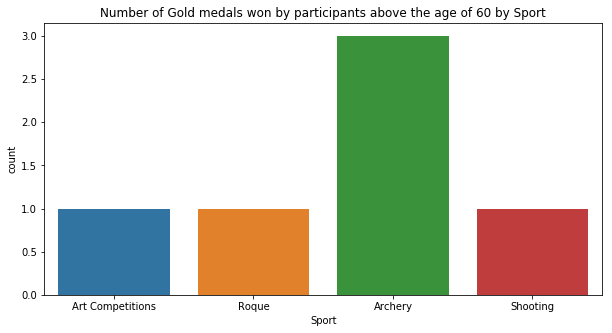

In [30]:
# plot bar chart of number of Gold medals won by participants above the age of 60 by sport

plt.figure(figsize=(10,5))
sns.countplot(sporting_event)
plt.title('Number of Gold medals won by participants above the age of 60 by Sport')

In [31]:
# Gold medals won by each country over the years

goldMedals.Region.value_counts().reset_index(name='Medal').head(5)

,index,Medal
0,USA,2627
1,Russia,1599
2,Germany,1293
3,UK,657
4,Italy,567


Text(0.5, 1.0, 'Top 5 Countries by Gold Medals')

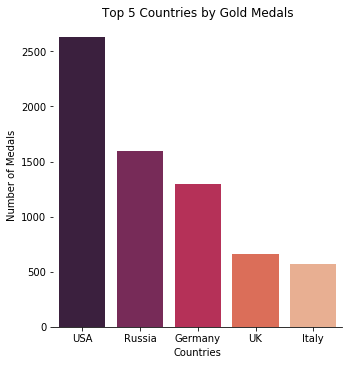

In [32]:
top5GoldMedalCountry = goldMedals.Region.value_counts().reset_index(name='Medal').head(5)

g = sns.catplot(x='index', y='Medal', data=top5GoldMedalCountry, height=5, kind='bar', palette='rocket')

g.despine(left=True)
g.set_xlabels('Countries')
g.set_ylabels('Number of Medals')
plt.title('Top 5 Countries by Gold Medals')

In [33]:
# Gold Medal Ranking for 2016 Rio Olympics

max_year = athletes_df.Year.max()

rio_gold_ranking = athletes_df[(athletes_df.Year == max_year) & (athletes_df.Medal == 'Gold')].Team

rio_gold_ranking.value_counts().head(5)

United States    137
Great Britain     64
Russia            50
Germany           47
China             44
Name: Team, dtype: int64

Text(0.5, 1.0, 'Gold Medal Ranking - 2016 Rio')

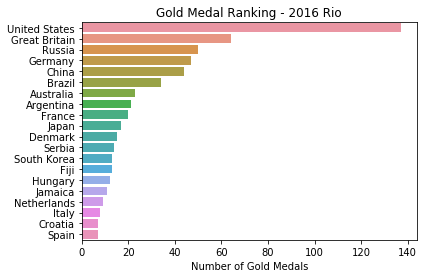

In [34]:
sns.barplot(x=rio_gold_ranking.value_counts().head(20), y=rio_gold_ranking.value_counts().head(20).index)

plt.ylabel(None)
plt.xlabel('Number of Gold Medals')
plt.title('Gold Medal Ranking - 2016 Rio')

In [35]:
# Create dataframe for Olympic Medalists only(remove Null fields in Medal column) while removing records with Null fields in height and weight

medalist = athletes_df[(athletes_df.Medal.notnull()) & (athletes_df.Height.notnull()) & (athletes_df.Weight.notnull())]

medalist_nan_values = medalist.isna()
medalist_nan_columns = medalist_nan_values.any()

medalist_nan_columns

ID        False
Name      False
Sex       False
Age        True
Height    False
Weight    False
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal     False
Region     True
Notes      True
dtype: bool

Text(0.5, 1.0, 'Weight vs Height of Olympic Medalists')

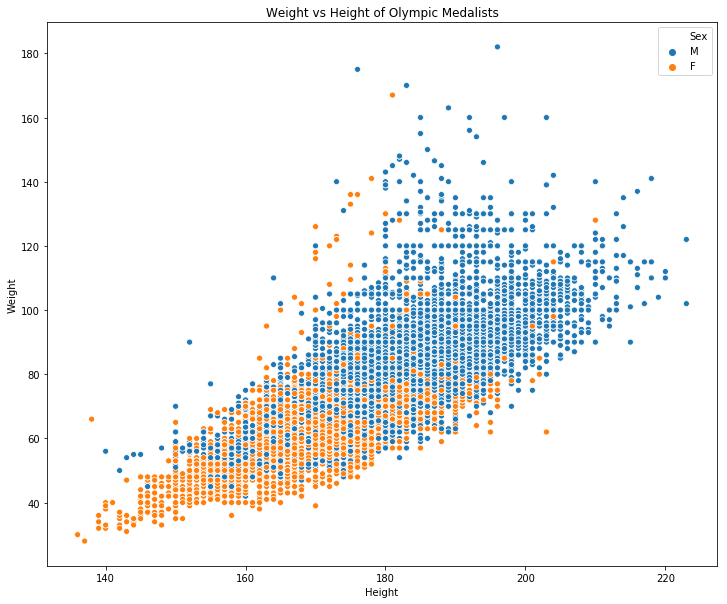

In [36]:
plt.figure(figsize=(12,10))
sns.scatterplot(x='Height', y='Weight', data=medalist, hue='Sex')
plt.title('Weight vs Height of Olympic Medalists')

In [37]:
# Singapore participants

sg_athletes = athletes_df.query('Team == "Singapore"')

sg_athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
578,332,Zarinah Abdullah,F,21.0,NaN,NaN,Singapore,SGP,1992 Summer,1992,Summer,Barcelona,Badminton,Badminton Women's Singles,NaN,NaN,NaN
579,332,Zarinah Abdullah,F,25.0,NaN,NaN,Singapore,SGP,1996 Summer,1996,Summer,Atlanta,Badminton,Badminton Women's Singles,NaN,NaN,NaN
2719,1515,Saiyidah Aisyah Mohamed Rafa'ee,F,28.0,173.0,68.0,Singapore,SGP,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Women's Single Sculls,NaN,NaN,NaN
7659,4264,Ang Peng Siong,M,21.0,180.0,75.0,Singapore,SGP,1984 Summer,1984,Summer,Los Angeles,Swimming,Swimming Men's 100 metres Freestyle,NaN,NaN,NaN
7660,4264,Ang Peng Siong,M,21.0,180.0,75.0,Singapore,SGP,1984 Summer,1984,Summer,Los Angeles,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,NaN,NaN,NaN


Text(0.5, 1.0, "Singapore's Participation over the years")

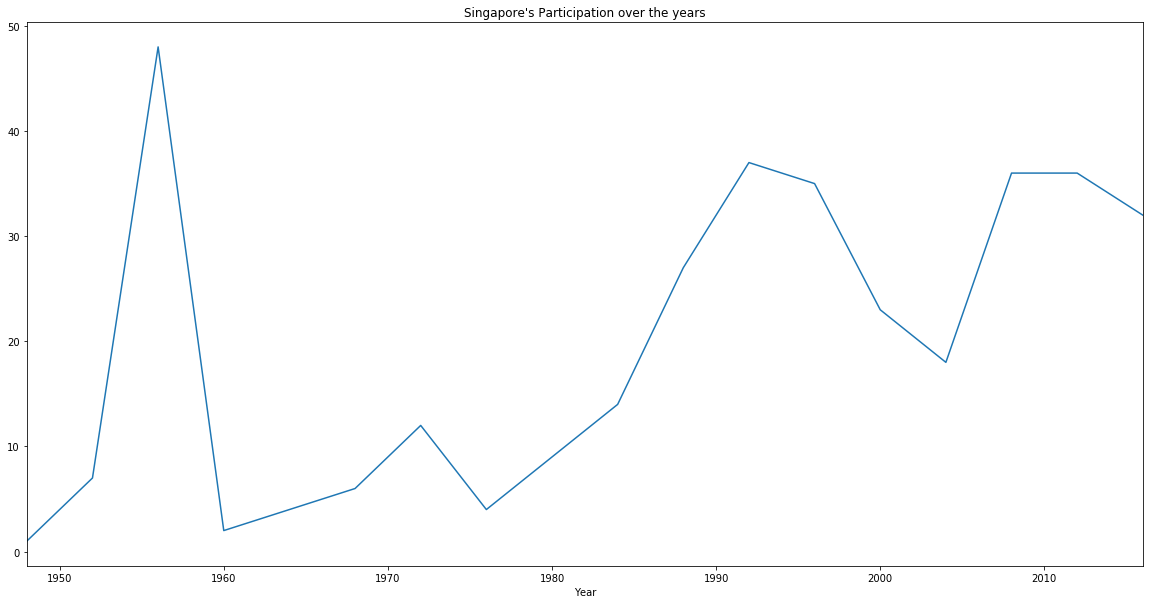

In [38]:
# Plot Number of Singaporean participants over the years

sg_part=sg_athletes.groupby('Year')['NOC'].value_counts()

plt.figure(figsize=(20,10))
sg_part.loc[:,'SGP'].plot()
plt.title("Singapore's Participation over the years")

In [39]:
# Number of Singapore athletes that participated in each Summer Olympics

sg_part = sg_athletes.groupby('Year')['NOC'].value_counts()

sg_part

Year  NOC
1948  SGP     1
1952  SGP     7
1956  SGP    48
1960  SGP     2
1968  SGP     6
1972  SGP    12
1976  SGP     4
1984  SGP    14
1988  SGP    27
1992  SGP    37
1996  SGP    35
2000  SGP    23
2004  SGP    18
2008  SGP    36
2012  SGP    36
2016  SGP    32
Name: NOC, dtype: int64

In [40]:
# Male vs Female representation for Team Singapore over the years

sg_male = sg_athletes[(sg_athletes.Sex=='M')][['Sex', 'Year']]
sg_male = sg_male.groupby('Year').count()

sg_male

,Sex
Year,
1948,1
1952,5
1956,45
1960,2
1968,6
1972,9
1976,3
1984,14
1988,26


In [41]:
# Female representation for Team Singapore over the years

sg_female = sg_athletes[(sg_athletes.Sex=='F')][['Sex', 'Year']]
sg_female = sg_female.groupby('Year').count()

sg_female

,Sex
Year,
1952,2
1956,3
1972,3
1976,1
1988,1
1992,14
1996,10
2000,13
2004,11


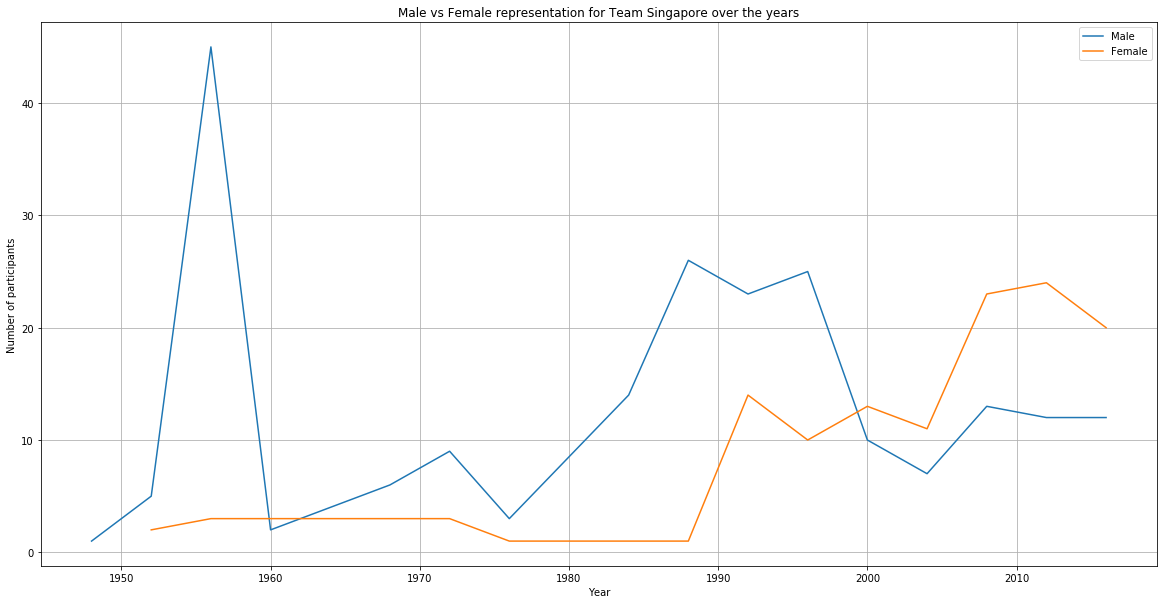

In [42]:
# Plot Male vs Female representation for Team Singapore over the years


plt.figure(figsize=(20,10))
plt.plot(sg_male['Sex'], label='Male')
plt.plot(sg_female['Sex'], label='Female')

plt.title("Male vs Female representation for Team Singapore over the years")
plt.xlabel('Year')
plt.ylabel('Number of participants')
plt.legend()
plt.grid()